In [ ]:
"""
An example of DL aux outputs for processing. This framework can be integrated into other workflows as needed.

Boston housing data will be used as an example case for both classification and regression tasks.

It should be noted that this is an example workflow for teaching purposes and exploratory analyses. More detailed and integrated 
pipelines are typically created for MLOps.

"""

#%%---------------------------------------
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

from sklearn.metrics import classification_report,confusion_matrix,r2_score,mean_squared_error,mean_absolute_error


In [ ]:
#Helper functions

def reg_model_eval(history,epochs):

  """
  A regression model evaluation using history and epoch parameters

  #Arguments 
    history (keras obj) - keras history object
    epochs  (keras obj) - keras epcohs object
  #Returns
    training an dvalidation plots for regression analysis
  """
  #NOTE due to train and validation set calculation specifics epochs need to be shifted by 0.5 according to some ML practitioners
  #Assess this based on your plots if that is necessary
  plt.plot(range(len(epochs)),history['mean_squared_error'],'b-',label="Train MSE")
  plt.plot(range(len(epochs)),history['val_mean_squared_error'],'r-',label="Validation MSE")
  plt.legend()
  plt.show()

  plt.plot(range(len(epochs)),history['mean_absolute_error'],'b-',label="Train MAE")
  plt.plot(range(len(epochs)),history['val_mean_absolute_error'],'r-',label="Validation MAE")
  plt.legend()
  plt.show()
  return

def class_model_eval(history,epochs):

  """
  A classification model evaluation using history and epoch parameters

  #Arguments 
    history (keras obj) - keras history object
    epochs  (keras obj) - keras epcohs object
  #Returns
    training an dvalidation plots for classification analysis
  """
  #NOTE due to train and validation set calculation specifics epochs need to be shifted
  plt.plot(range(len(epochs)),history['loss'],'b-',label="Train loss")
  plt.plot(range(len(epochs)),history['val_loss'],'r-',label="Validation loss")
  plt.legend()
  plt.show()

  plt.plot(range(len(epochs)),history['accuracy'],'b-',label="Train accuracy")
  plt.plot(range(len(epochs)),history['val_accuracy'],'r-',label="Validation accuracy")
  plt.legend()
  plt.show()
  return

from sklearn.model_selection import StratifiedShuffleSplit
from pandas.api.types import is_numeric_dtype
import pandas as pd


def stratified_split(data:pd.DataFrame,target: pd.DataFrame,variable: str):

    """
    Function takes data as a dataframe and a variable as a string value to perform a stratified split.

    Test set size is 20%
    """

    data=data.copy()

    
    #If categorical value is already in place use that to split the data

    split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)

    #Target values are used for the splitting
    train_idx,test_idx=[(train_idx,test_idx) for train_idx,test_idx in split.split(target,target[variable])][0]


    X_train=data.iloc[train_idx,:]
    y_train=target.iloc[train_idx,:]

    X_test=data.iloc[test_idx,:]
    y_test=target.iloc[test_idx,:]

    return X_train, X_test,y_train,y_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

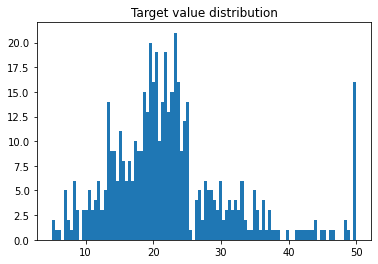

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

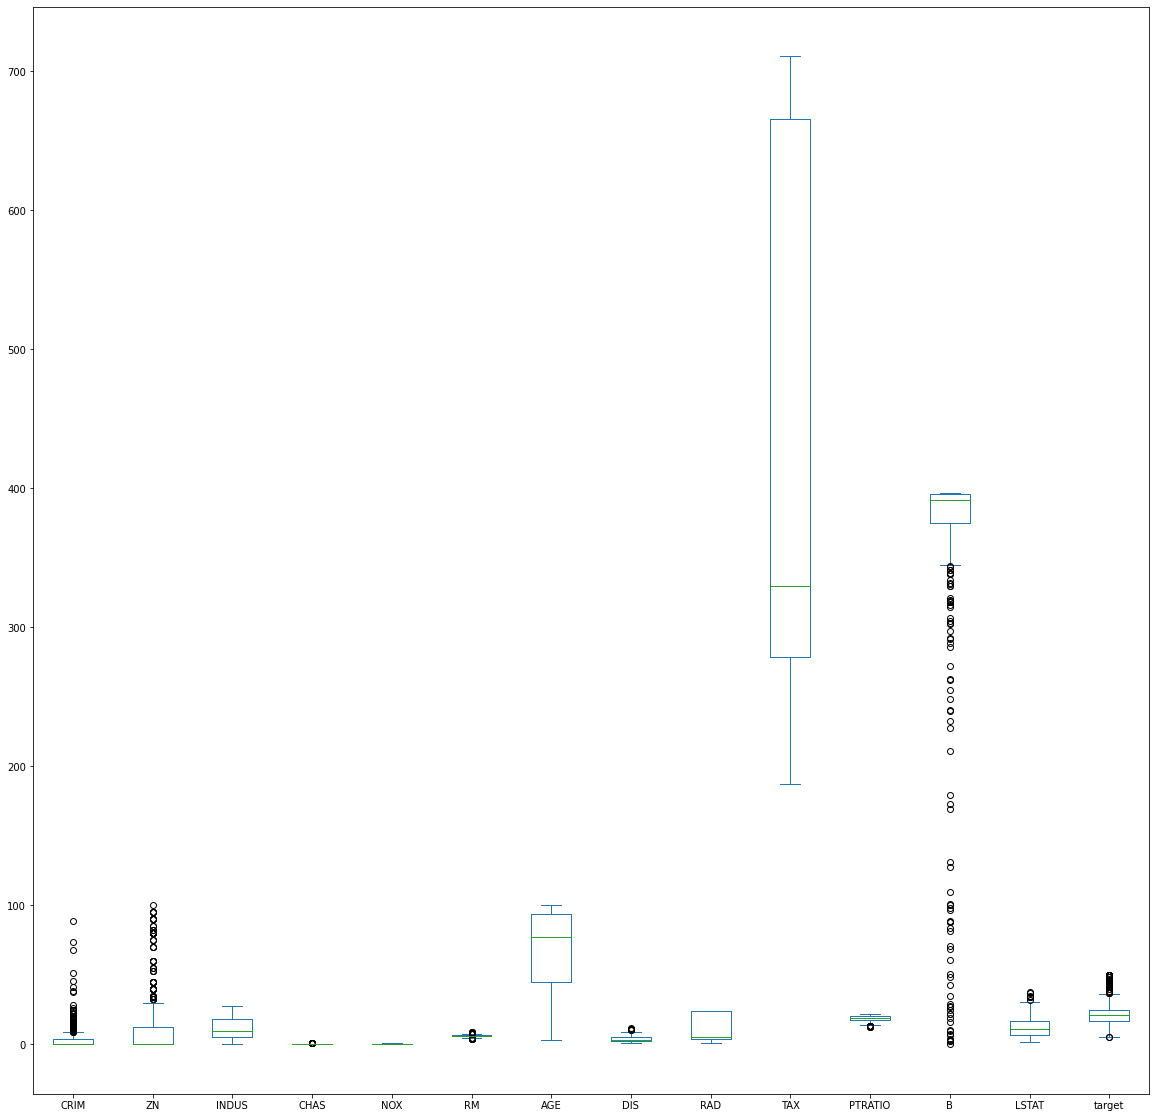

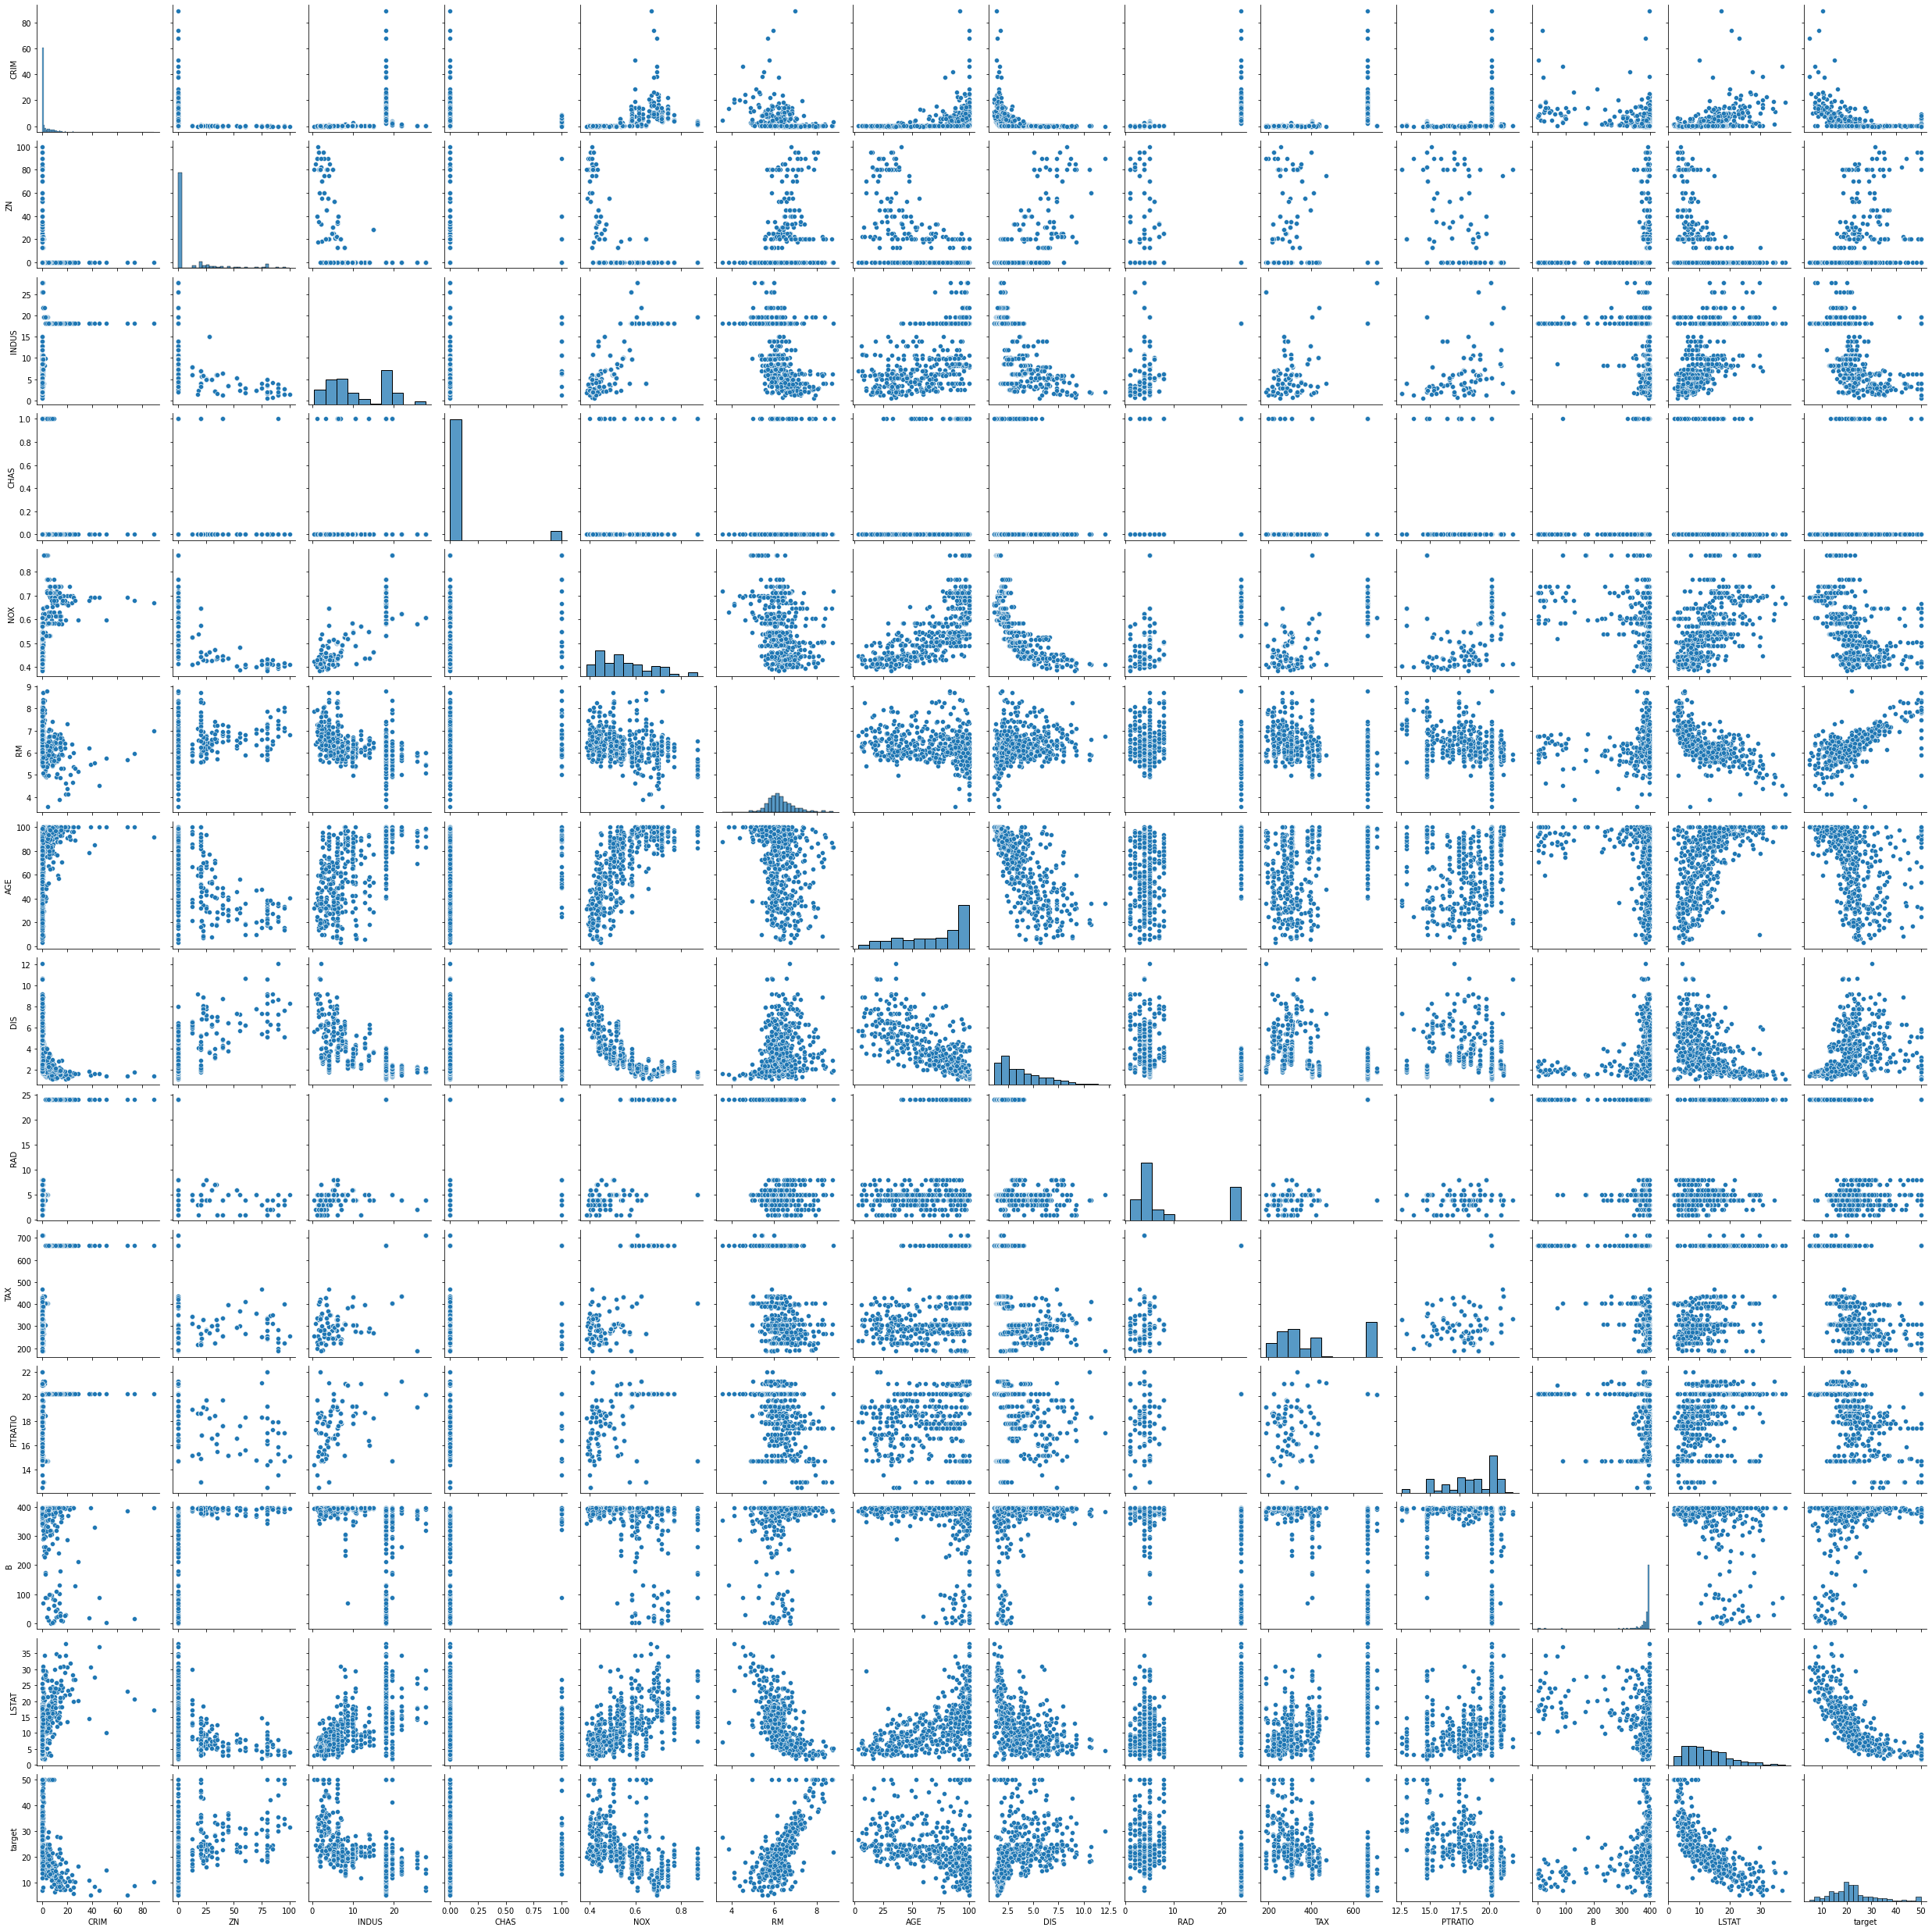

In [ ]:
#Load data

data_boston=load_boston()

data=pd.DataFrame(data=data_boston.data,columns=data_boston.feature_names)
target=data_boston.target

#Check the data (high level overview)
#NOTE you should build a separate custom set of functions for data integrity checks and EDA

plt.hist(target,bins=100)
plt.title("Target value distribution")
plt.show()

df=data.copy()
df['target']=target
print(df.describe(),"\n")

print(data.head(),"\n")

df.plot.box(figsize=(20,20))
plt.show()

sns.pairplot(df,diag_kind='hist')
plt.show()
#NOTE outlier, multicollinearity and other effects should be assessed and data should be cleaned before further processing
#There are additional considerations (e.g., cutoff values introduced in this data, etc.)
#For the example purposes, this will not be done

In [ ]:
#We will include a qualitative feature for the data by splitting target values into low (0), medium (1), and high(2)
#The numbering will be used to avoid additional label binarisation.
#NOTE the indexing has to start with 0 for sparse_categorical_crossentropy
#NOTE splitting can affect how the data is trained, especially if it leads to categories that have very samples.
#For demonstration purposes we are selecting a simple model split.
target_class=pd.qcut(target,q=3,labels=[0,1,2])

df['target_class']=target_class

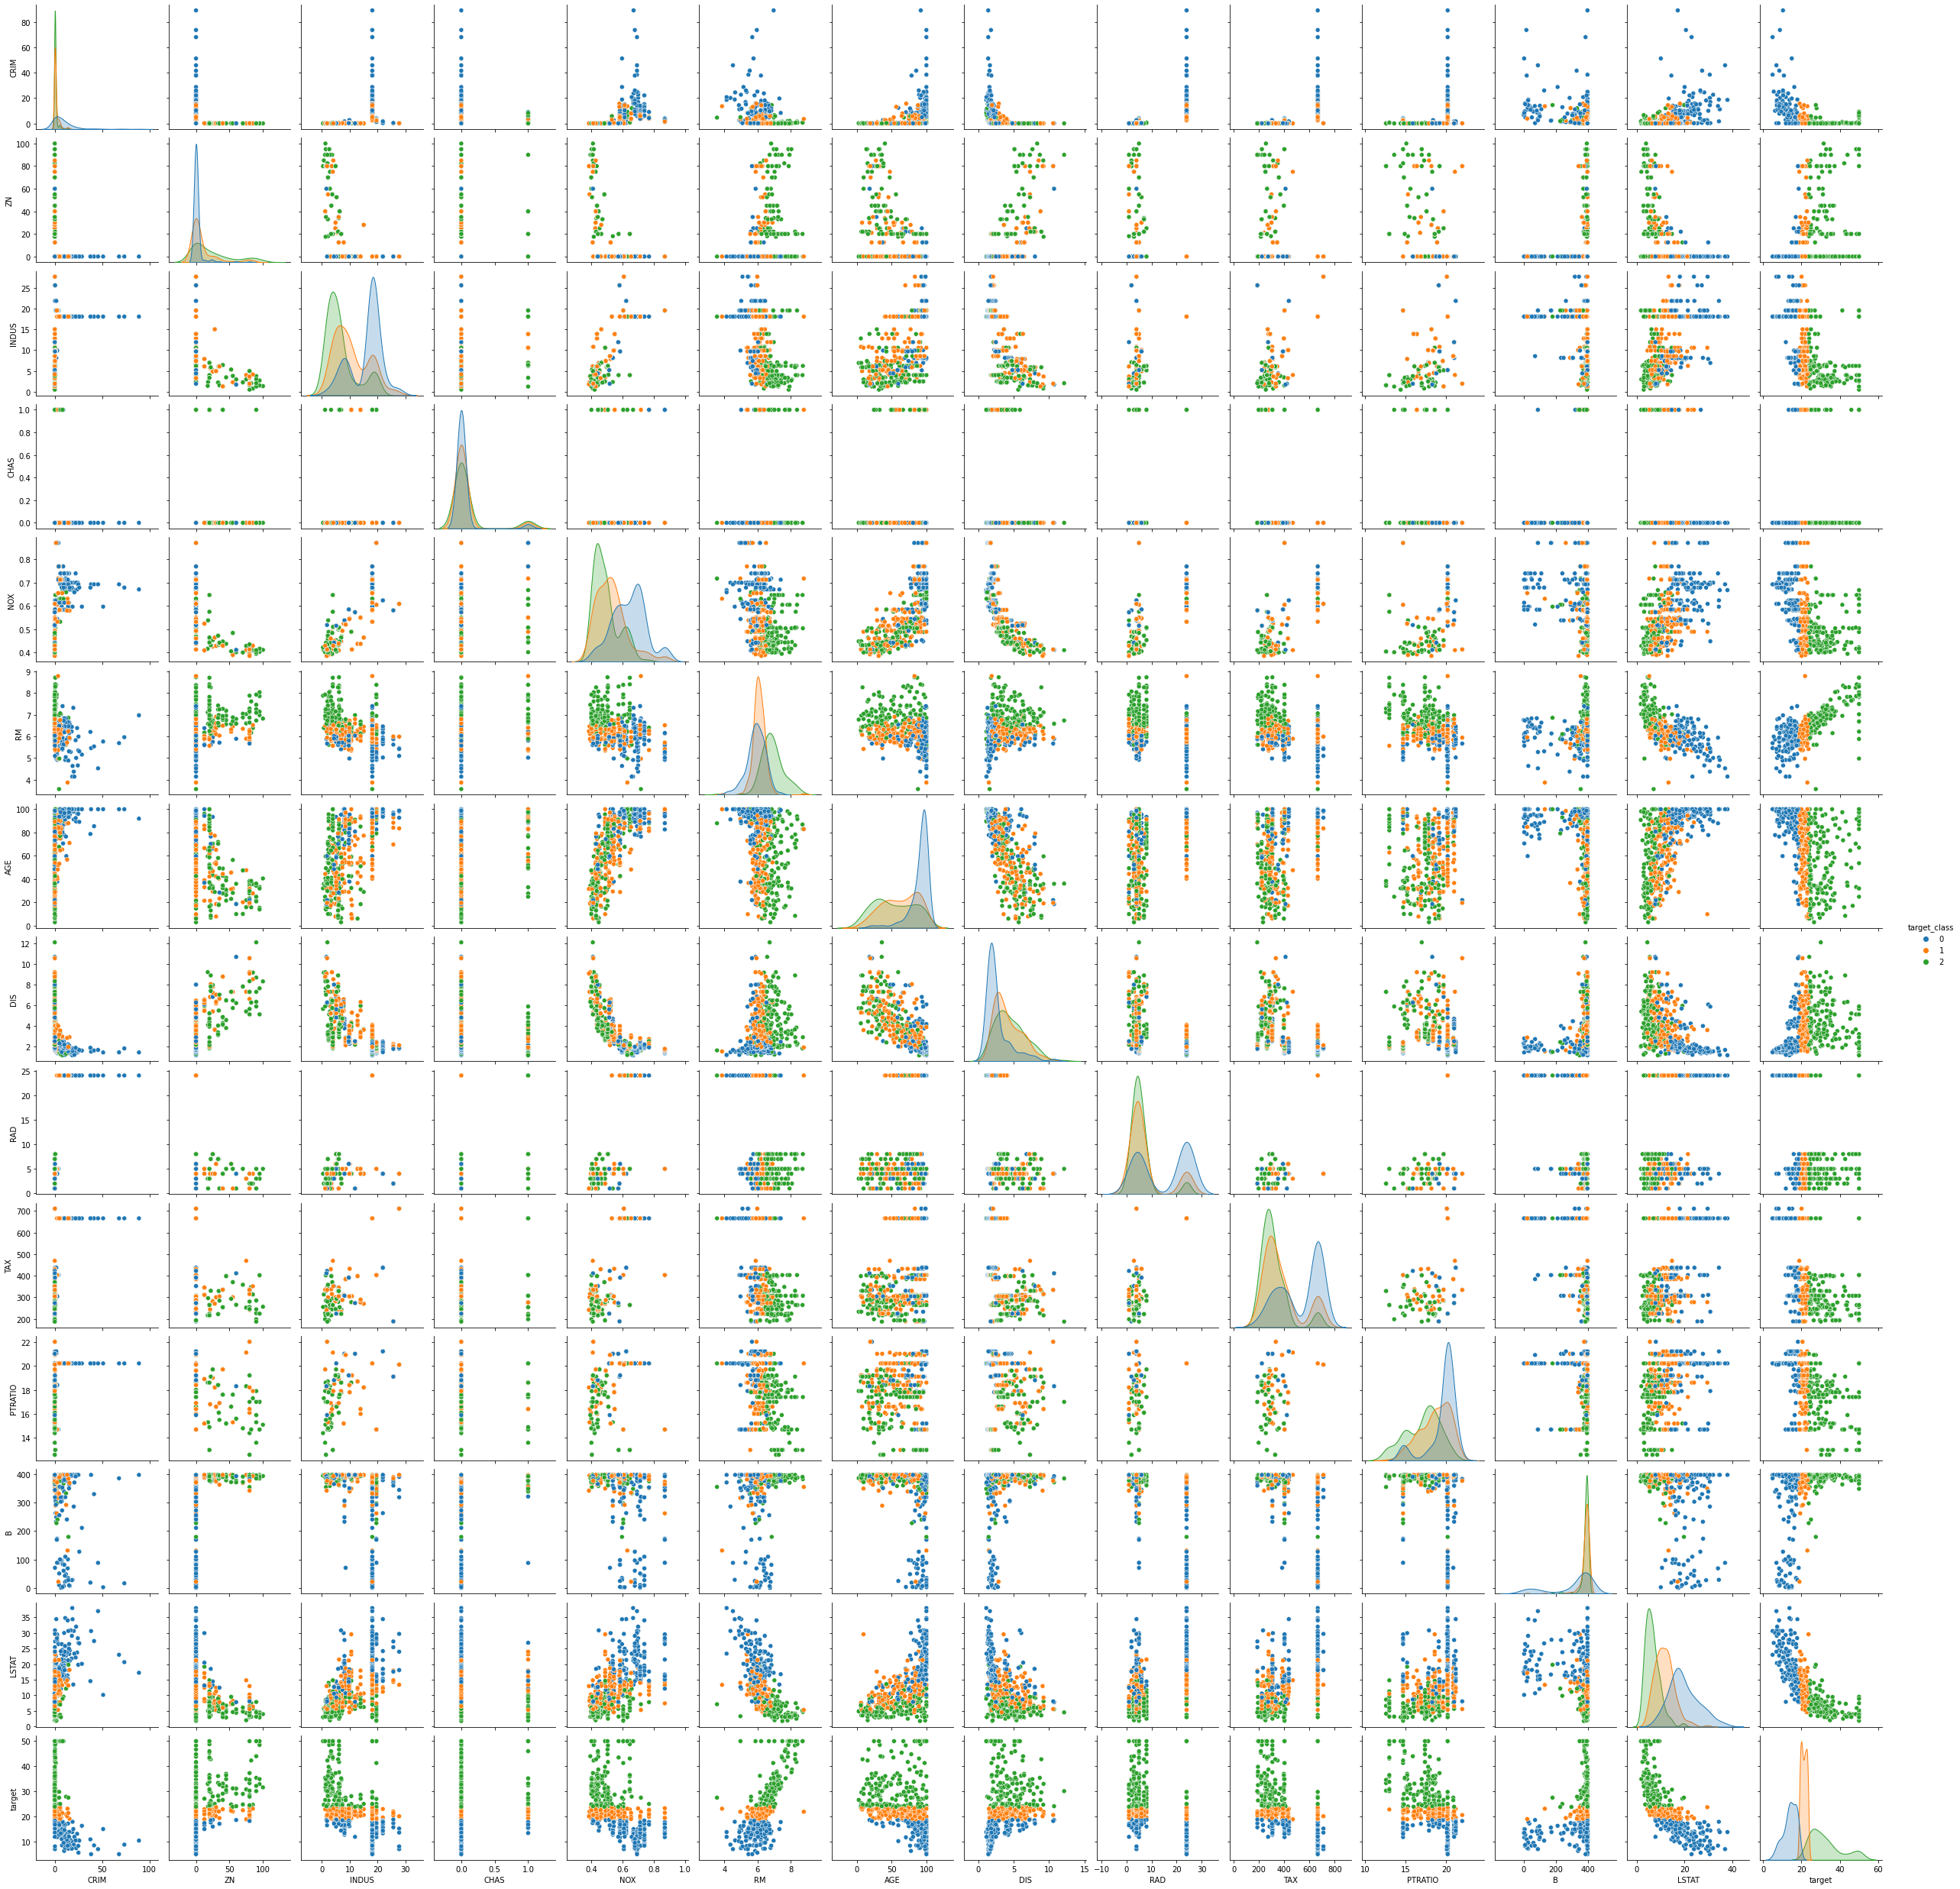

In [ ]:
#Use pairplots to quickly evaluate any dependencies or cutoffs in the data

sns.pairplot(df,diag_kind='kde',hue='target_class')
plt.show()

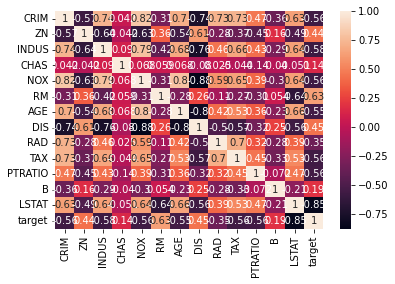

In [ ]:
#Check for value correlation
sns.heatmap(df.corr(method='spearman'),annot=True)
plt.show()



In [ ]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
targets_df=pd.DataFrame(target,columns=['target'])
targets_df['target_class']=np.array(target_class,dtype='float32')
targets_df.head()

target  target_class
0    24.0           2.0
1    21.6           1.0
2    34.7           2.0
3    33.4           2.0
4    36.2           2.0

In [ ]:
targets_df[targets_df['target_class'].isna()]

Empty DataFrame
Columns: [target, target_class]
Index: []

In [ ]:
#Prepare data for modelling


#Split data

X_train,X_test,y_train,y_test=train_test_split(data,targets_df,test_size=0.2,random_state=0)

#Scale data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



In [ ]:
y_train.head()

target  target_class
220    26.7           2.0
71     21.7           1.0
240    22.0           1.0
6      22.9           1.0
417    10.4           0.0

In [ ]:
#Split train and test label data

y_train_A, y_train_B=y_train.iloc[:,0],y_train.iloc[:,1]
y_test_A, y_test_B=y_test.iloc[:,0],y_test.iloc[:,1]

print(y_train_A.shape)

(404,)


In [ ]:
y_train_A

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: target, Length: 404, dtype: float64

In [ ]:
y_train_B

220    2.0
71     1.0
240    1.0
6      1.0
417    0.0
      ... 
323    0.0
192    2.0
117    1.0
47     0.0
172    1.0
Name: target_class, Length: 404, dtype: float32

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


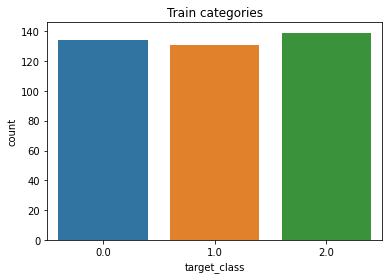

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


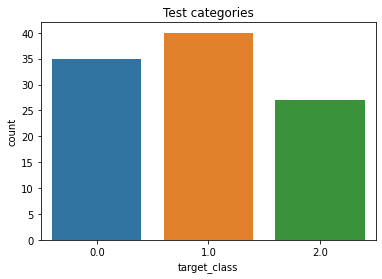

In [ ]:
#Check splitting for different categories
#NOTE stratified split might be considered if the performance is significantly affected
sns.countplot(y_train_B)
plt.title("Train categories")
plt.show()

sns.countplot(y_test_B)
plt.title("Test categories")
plt.show()

In [ ]:
#Set params

EPOCHS=500
BATCH=128
VAL_SPLIT=0.2
NUM_CLASSES=3
INPUT_SHAPE=X_train.shape[1:]
callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, min_delta=1) 

Baseline models allow you to better assess the model performance and draft potential architecture configurations.

**NOTE** baseline models should be included to monitor and benchmark your the configurations that you deploy

In [ ]:
#Create a baseline regression model

def reg_base_model(units=10,input_shape=INPUT_SHAPE):
  """
  A simple model builder to establish a baseline regression 
  #NOTE several baseline models can be used to better assess target model performance
  
  #Arguments
  units, int - dense layer units
  input_shape, tuple(int) - input shape (None, Features)

  #Returns
  model (keras obj)
  """
  model=Sequential()

  model.add(Dense(units,activation='relu',input_shape=input_shape))


  model.add(Dense(1))

  model.summary()
  model.compile(loss="mean_squared_error",optimizer='adam',metrics=['mean_squared_error','mean_absolute_error'])

  return model



In [ ]:
#Create a baseline classification model

def class_base_model(num_classes,units=10,input_shape=INPUT_SHAPE):
  """
  A simple model builder to establish a baseline classification 
  #NOTE several baseline models can be used to better assess target model performance
  
  #Arguments
  units, int - dense layer units
  input_shape, tuple(int) - input shape (None, Features)
  num_classes, int - number of classes, default is 1 (which will generate an error)
  #Returns
  model (keras obj)
  """
  model=Sequential()

  model.add(Dense(units,activation='relu',input_shape=input_shape))
 

  if num_classes>=3:
    model.add(Dense(num_classes,activation='softmax'))
  else:
    model.add(Dense(1,activation='sigmoid'))
  model.summary()

  if num_classes>=3:
    model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
  else:
    model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

  return model

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 6)                 84        
                                                                 
 dense_41 (Dense)            (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 1s 99ms/step - loss: 611.5665 - mean_squared_error: 611.5665 - mean_absolute_error: 22.8815 - val_loss: 605.0607 - val_mean_squared_error: 605.0607 - val_mean_absolute_error: 22.5081
Epoch 2/500
3/3 [==============================] - 0s 14ms/step - loss: 609.7098 - mean_squared_error: 609.7098 - mean_absolute_error: 22.8463 - val_loss: 602.9761 - val_mean_squared_error: 602.9761 - val_mean_absolute_

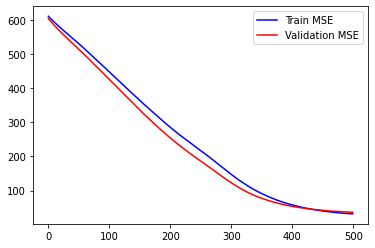

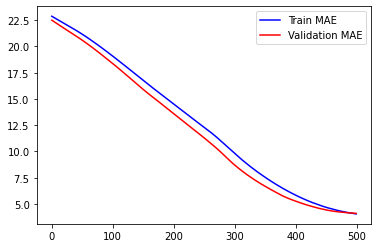

In [ ]:
#Fit base model for regressor
base_model_reg=reg_base_model(6)
history=base_model_reg.fit(X_train,y_train_A,batch_size=BATCH,epochs=EPOCHS,validation_split=VAL_SPLIT) #validation_data=[X_test,y_test_A]

epochs=history.epoch
history=history.history
BEST_EPOCH=np.argmin(history['val_loss'])
print("Best epoch", np.argmin(history['val_loss']))


reg_model_eval(history,epochs)



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 6)                 84        
                                                                 
 dense_43 (Dense)            (None, 3)                 21        
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
3/3 [==============================] - 0s 53ms/step - loss: 0.8589 - accuracy: 0.5789 - val_loss: 0.9354 - val_accuracy: 0.5062
Epoch 2/250
3/3 [==============================] - 0s 10ms/step - loss: 0.8506 - accuracy: 0.5789 - val_loss: 0.9246 - val_accuracy: 0.5062
Epoch 3/250
3/3 [==============================] - 0s 10ms/step - loss: 0.8428 - accuracy: 0.5759 - val_loss: 0.9144 - val_accuracy: 0.5185
Epoch 4/250
3/3 [==============

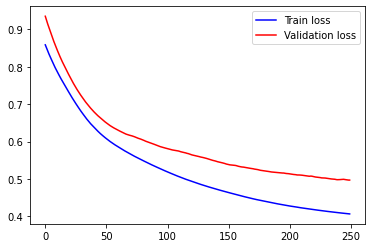

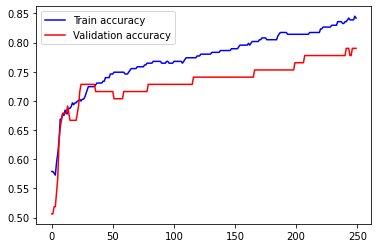

In [ ]:
#Fit base model for classifier
base_model_class=class_base_model(NUM_CLASSES,6)
history=base_model_class.fit(X_train,y_train_B,batch_size=BATCH,epochs=EPOCHS//2,validation_split=VAL_SPLIT)

epochs=history.epoch
history=history.history
BEST_EPOCH=np.argmin(history['val_loss'])
print("Best epoch", np.argmin(history['val_loss']))


class_model_eval(history,epochs)

#NOTE models can be saved

In [ ]:

#Evaluate base models
base_model_reg.evaluate(X_test,y_test_A)

y_pred_reg=base_model_reg.predict(X_test)

print("R2 reg model evaluation",r2_score(y_test_A,y_pred_reg),"\n")


base_model_class.evaluate(X_test,y_test_B)

y_pred_class=base_model_class.predict(X_test)

print("Classification model evaluation\n",classification_report(y_test_B,np.argmax(y_pred_class,axis=1)),"\n")


4/4 [==============================] - 0s 2ms/step - loss: 57.0259 - mean_squared_error: 57.0259 - mean_absolute_error: 5.6466
R2 reg model evaluation 0.29968054932469 

4/4 [==============================] - 0s 2ms/step - loss: 0.8343 - accuracy: 0.6176
Classification model evaluation
               precision    recall  f1-score   support

         0.0       0.69      0.63      0.66        35
         1.0       0.57      0.65      0.60        40
         2.0       0.62      0.56      0.59        27

    accuracy                           0.62       102
   macro avg       0.63      0.61      0.62       102
weighted avg       0.62      0.62      0.62       102
 



In [141]:
def functional_model_1(num_classes,units=32, dropout=0.2,input_shape=INPUT_SHAPE):
  """
  A simple functional model builder with wide and deep elements where deep output is also used 
  as an additional output for a classification task
  #Arguments
  units, int - dense layer units
  input_shape, tuple(int) - input shape (None, Features)
  num_classes, int - input for the number of classes
  #Returns
  model (keras obj)

  #Model architecture
    The model takes two identical inputs (input_1,input_2) where input_2 belongs to the deep part of the model and also 
    contributes to the classification aux-output

    The regression part of the model combines both wide (input_1) and deep (input_2) elements to capture simple and more complex patterns.

  #NOTE multi-output models can be used when the same processing is necessary for several different tasks
  or when you want to capture outputs for specific/additional analyses to monitor how inner layers learn
  """
  input_1=keras.layers.Input(shape=input_shape) #regression wide input
  input_2=keras.layers.Input(shape=input_shape) #regression and classification deep input

  hidden1=keras.layers.Dense(units*3,activation='selu')(input_2)
  dropout_1_2=keras.layers.Dropout(dropout)(hidden1)
  hidden2=keras.layers.Dense(units*2,activation='selu')(dropout_1_2)
  dropout_2_3=keras.layers.Dropout(dropout)(hidden2)
  hidden3=keras.layers.Dense(units,activation='selu')(dropout_2_3)
  dropout_3_4=keras.layers.Dropout(dropout)(hidden3)

  hidden4=None
  if units//2 > 10:
    hidden4=keras.layers.Dense(units//2,activation='selu')(dropout_3_4)
  
  if hidden4 is not None:
    concat=keras.layers.Concatenate()([input_1,hidden4])
  else:
    concat=keras.layers.Concatenate()([input_1,dropout_3_4])
  
  #Define the main output
  output=keras.layers.Dense(1,name="regression_output")(concat)

  #Define classification output
  if num_classes>=3:
    if hidden4 is not None:
      aux_output=keras.layers.Dense(num_classes,activation='softmax',name="classification_output")(hidden4)
    else:
      aux_output=keras.layers.Dense(num_classes,activation='softmax',name="classification_output")(dropout_3_4)
  else:
    if hidden4 is not None:
      aux_output=keras.layers.Dense(num_classes,activation='sigmoid',name="classification_output")(hidden4)
    else:
      aux_output=keras.layers.Dense(num_classes,activation='sigmoid',name="classification_output")(dropout_3_4)

  model=keras.Model(inputs=[input_1,input_2],outputs=[output,aux_output])


  model.summary()

  if num_classes>=3:
    model.compile(loss=["mean_squared_error",'sparse_categorical_crossentropy'],loss_weights=[0.5,0.5],optimizer='adam',metrics=[['mean_squared_error','mean_absolute_error'],'accuracy'])
  else:
    model.compile(loss=["mean_squared_error",'binary_crossentropy'],loss_weights=[0.5,0.5],optimizer='adam',metrics=[['mean_squared_error','mean_absolute_error'],'accuracy'])


  return model  

In [ ]:
#Fit functional model for both regression and classification tasks

rc_model=functional_model_1(NUM_CLASSES,64,dropout=0.2)

history=rc_model.fit([X_train,X_train],[y_train_A,y_train_B],batch_size=BATCH,epochs=EPOCHS,validation_split=VAL_SPLIT)

epochs=history.epoch
history=history.history
BEST_EPOCH=np.argmin(history['val_loss'])
print("Best epoch", np.argmin(history['val_loss']))




In [ ]:
history.keys()

dict_keys(['loss', 'regression_output_loss', 'classification_output_loss', 'regression_output_mean_squared_error', 'regression_output_mean_absolute_error', 'classification_output_accuracy', 'val_loss', 'val_regression_output_loss', 'val_classification_output_loss', 'val_regression_output_mean_squared_error', 'val_regression_output_mean_absolute_error', 'val_classification_output_accuracy'])

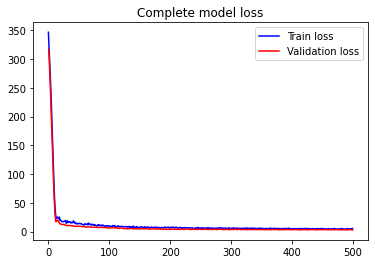

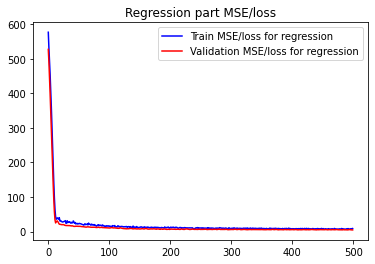

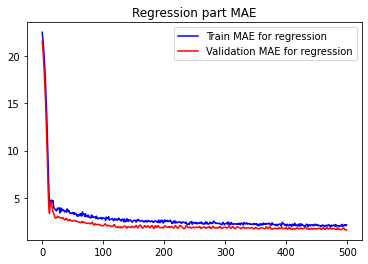

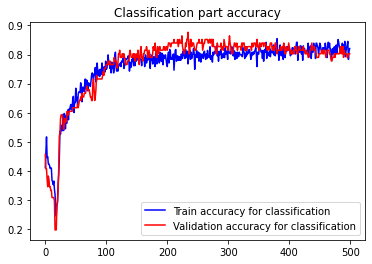

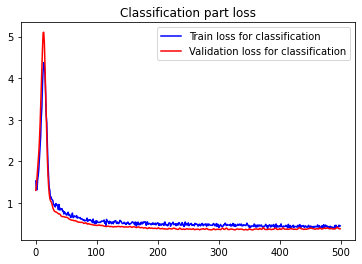

In [142]:
#Evaluate combined loss values where loss_weights are weighed based on the values provided earlier

plt.plot(range(len(epochs)),history['loss'],'b-',label="Train loss")
plt.plot(np.arange(0.5,len(epochs)+0.5),history['val_loss'],'r-',label="Validation loss")
plt.legend()
plt.title("Complete model loss")
plt.show()

#Assess individual models

#Regression
plt.plot(range(len(epochs)),history['regression_output_mean_squared_error'],'b-',label="Train MSE/loss for regression")
plt.plot(range(len(epochs)),history['val_regression_output_mean_squared_error'],'r-',label="Validation MSE/loss for regression")
plt.legend()
plt.title("Regression part MSE/loss")
plt.show()

plt.plot(range(len(epochs)),history['regression_output_mean_absolute_error'],'b-',label="Train MAE for regression")
plt.plot(range(len(epochs)),history['val_regression_output_mean_absolute_error'],'r-',label="Validation MAE for regression")
plt.legend()
plt.title("Regression part MAE")
plt.show()

#Classification
plt.plot(range(len(epochs)),history['classification_output_accuracy'],'b-',label="Train accuracy for classification")
plt.plot(range(len(epochs)),history['val_classification_output_accuracy'],'r-',label="Validation accuracy for classification")
plt.legend()
plt.title("Classification part accuracy")
plt.show()

plt.plot(range(len(epochs)),history['classification_output_loss'],'b-',label="Train loss for classification")
plt.plot(range(len(epochs)),history['val_classification_output_loss'],'r-',label="Validation loss for classification")
plt.legend()
plt.title("Classification part loss")
plt.show()

In [143]:
#Evaluate functional model
rc_model.evaluate([X_test,X_test],[y_test_A,y_test_B])

y_pred_reg,y_pred_class=rc_model.predict([X_test,X_test])



4/4 [==============================] - 0s 2ms/step - loss: 9.7977 - regression_output_loss: 15.8451 - classification_output_loss: 0.7265 - regression_output_mean_squared_error: 15.8451 - regression_output_mean_absolute_error: 2.5818 - classification_output_accuracy: 0.7059


In [144]:
print("R2 reg model evaluation",r2_score(y_test_A,y_pred_reg),"\n")
print("Classification model evaluation\n",classification_report(y_test_B,np.argmax(y_pred_class,axis=1)),"\n")


R2 reg model evaluation 0.8054104956112315 

Classification model evaluation
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.75        35
         1.0       0.63      0.72      0.67        40
         2.0       0.75      0.67      0.71        27

    accuracy                           0.71       102
   macro avg       0.72      0.70      0.71       102
weighted avg       0.71      0.71      0.71       102
 



It is important to evaluate models to avoid overfitting or fitting colinear patterns. Base models allow us to establish a baseline model behaviour and outline potential model architectures for further exploration.

As can be seen from the above examples, there is some overfitting and some additional techniques should be explored when building models ready to be deployed. However, the goal of these examples was to demonstrate functional API and multi-output architecture.